In [1]:
%matplotlib widget

# Session 2

## First X-ray radiograph simulations with ![gVXR](../img/gvxr_logo.png)

## Authors: Ben Thorpe, Iwan Mitchel and Franck Vidal

(version 1.0, 7 Oct 2022)

# Aims of this session

- Create our first X-ray simulation, step-by-step;
- Save our X-ray image in a file format that preserves the original dynamic range;
- Visualise the results with 3 different look-up tables;
- Visualise the 3D environment.
- **Simplify the prototyping usin a JSON file.**

![](../img/02-visualisation.png)

# Main steps

There are 6 main steps to simulate an X-ray image:

1. Create a renderer (OpenGL context) -- `json2gvxr.initGVXR("fname.json", "OPENGL" | "EGL")`
2. Set the X-ray source -- `json2gvxr.initSourceGeometry()`;
3. Set the Spectrum -- `json2gvxr.initSpectrum()`;
4. Set the Detector -- `json2gvxr.initDetector()`;
5. Set the Sample -- `json2gvxr.initSamples()`;
6. Compute the corresponding X-ray image -- `gvxr.computeXRayImage()`.

![](../img/dragon2.jpg)

## Import packages

This is essentially just boilerplate code to set everything up for the session. We don't need to know the exact details at this stage so for now we can safely run this cell and move on. However, for the curious the comments explain what the various packages are for.  

In [2]:
import os
import numpy as np # Who does not use Numpy?

import matplotlib # To plot images
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table

font = {'family' : 'serif',
         'size'   : 10
       }
matplotlib.rc('font', **font)

# Uncomment the line below to use LaTeX fonts
# matplotlib.rc('text', usetex=True)

from tifffile import imread, imwrite # Write TIFF files

from gvxrPython3 import gvxr # Simulate X-ray images
from gvxrPython3 import json2gvxr # Set the simulation parameters using a JSON file
from gvxrPython3.utils import saveProjections # Plot the X-ray image in linear, log and power law scales
from gvxrPython3.utils import compareWithGroundTruth # Plot the ground truth, the test image, and the relative error map in %

spekpy is not install, you won't be able to load a beam spectrum using spekpy
SimpleGVXR 2.0.2 (2022-10-07T20:46:36) [Compiler: Apple Clang] on Darwin
gVirtualXRay core library (gvxr) 2.0.2 (2022-10-07T20:46:34) [Compiler: Apple Clang] on Darwin


## Create an OpenGL context

Our first real step is to create what is known as an OpenGl context. This can be thought of a digital blank canvas onto which we will place our objects (Detector, Sample, X-ray source etc). Depending on your Operating system GVXR supports 2 different types of OpenGl contexts (backends), "OPENGL" and "EGL".

- "OPENGL" Creates an interactive window (available on Linux, MacOS, and Windows) for use on Laptop/desktop computers.
- "EGL" Creates a context without a window (available on Linux and MacOS, but not Windows) for use on supercomputers or the cloud.

For this tutorial (and the subsequent ones) we will stick with **"EGL"**, this is because we are using the Cloud for this training. On my PC and laptop, I would use "OPENGL" to enable an interactive 3D visualisation window.

In [3]:
print("Create an OpenGL context")

# For the Cloud
# json2gvxr.initGVXR("notebook2.json", "EGL")

# For my laptop
json2gvxr.initGVXR("notebook2.json", "OPENGL")

Create an OpenGL context
Create an OpenGL context: 800x450


Fri Oct  7 21:33:00 2022 ---- Create window (ID: -1)
Fri Oct  7 21:33:00 2022 ---- Initialise GLFW
Fri Oct  7 21:33:00 2022 ---- Create an OpenGL window with a 3.2 context.
Fri Oct  7 21:33:00 2022 ---- Make the window's context current
Fri Oct  7 21:33:00 2022 ---- Initialise GLEW
Fri Oct  7 21:33:01 2022 ---- OpenGL vendor: Intel Inc.
Fri Oct  7 21:33:01 2022 ---- OpenGL renderer: Intel(R) Iris(TM) Plus Graphics 650
Fri Oct  7 21:33:01 2022 ---- OpenGL version: 4.1 INTEL-16.4.5
Fri Oct  7 21:33:01 2022 ---- Cannot use OpenGL 4.5. You live in the past.
Fri Oct  7 21:33:01 2022 ---- Use OpenGL 3.2.
Fri Oct  7 21:33:01 2022 ---- Initialise the X-ray renderer if needed and if possible


## Setting up the X-ray source

In [4]:
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()

Set up the beam
	Source position: [0, -40, 0, 'cm']
	Source shape: PointSource


({80: 1000}, 'keV', array([80]), array([1000]))

## Setting up the detector:

In [5]:
json2gvxr.initDetector()

Set up the detector
	Detector position: [0, 10, 0, 'cm']
	Detector up vector: [0, 0, -1]
	Detector number of pixels: [640, 320]
	Pixel spacing: [0.5, 0.5, 'mm']


Fri Oct  7 21:33:01 2022 ---- Initialise the renderer


## Setting up the sample

In [6]:
json2gvxr.initSamples()

Fri Oct  7 21:33:01 2022 ---- file_name:	/Users/eese10/PROGRAMMING/GitHub/gvxr-ibsim-4i-2022/input_data/welsh-dragon-small.stl	nb_faces:	457345	nb_vertices:	1372035	bounding_box (in cm):	(-4.47065, -74.9368, 23.5909)	(2.37482, -59.4256, 36.0343)


## Compute the corresponding X-ray image

In [7]:
xray_image = np.array(gvxr.computeXRayImage()).astype(np.single)

# Create the output directory if needed
if not os.path.exists("output_data"):
    os.mkdir("output_data")

# write x-rayimage to file
gvxr.saveLastXRayImage('output_data/02-gvxr-save.tif')

# Display the X-ray image

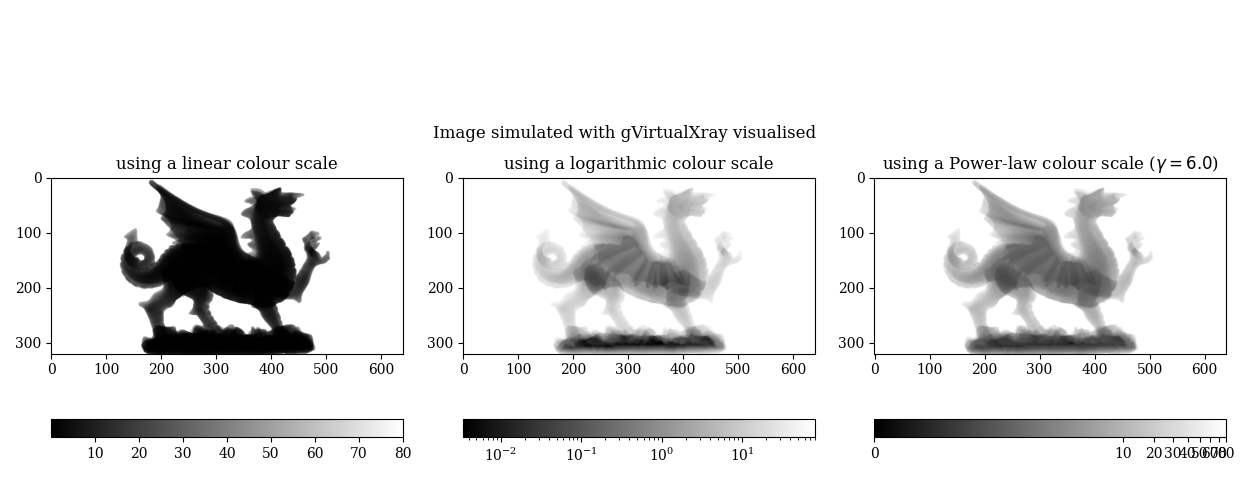

In [8]:
gamma = 6.0
saveProjections(xray_image, "output_data/02-projections-dragon-Ti.pdf", gamma=gamma, figsize=(12.5, 5))

# Double-check our results

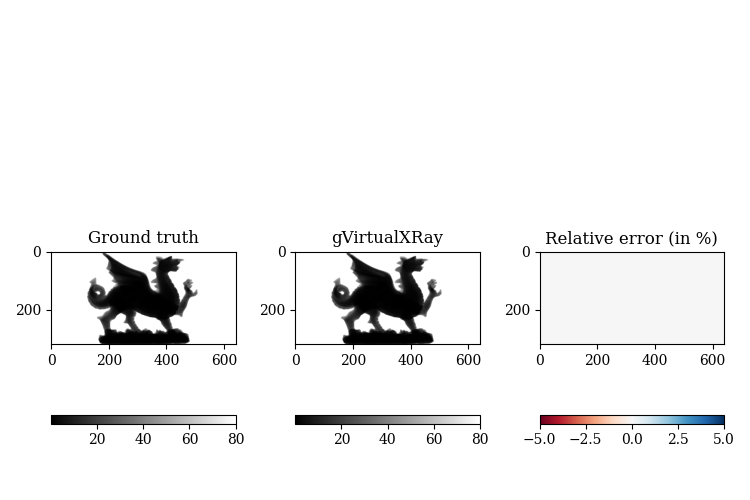

In [9]:
ground_truth = imread("../input_data/02-dragon-Ti-groundtruth.tif")
compareWithGroundTruth(ground_truth, xray_image, figsize=(7.5, 5))

<div class="alert alert-block alert-warning">
<b>Note:</b> this will function only work for "OPENGL" and have no effect when using "EGL" on supercomputers or the cloud, as there is no window to render to. It will however, work on a desktop or laptop computer.
</div>

# Cleaning up

Once we have finished it is good practice to clean up the OpenGL contexts and windows with the following command.

In [10]:
gvxr.terminate()

Fri Oct  7 21:33:03 2022 ---- Destroy all the windows
Fri Oct  7 21:33:03 2022 ---- Destroy window 0(0x7ff5c9cb6120)
